Then this is supposed to work

In [1]:
import threading
import sys
import time
import numpy as np
import pylab as pl

sys.path.append('../')

from vent.coordinator.control_module import get_control_module   # this is the file to change
from vent.coordinator.message import SensorValues, ControlSettings, Alarm

In [2]:
example = SensorValues()
example.

In [3]:
exampleCS = ControlSettings(name='PEEP', value=5, min_value=4, \
                          max_value=6, timestamp=time.time())

In [4]:
exitFlag = 0

class ControllerThread(threading.Thread):
    def __init__(self, threadID, name, counter):
        threading.Thread.__init__(self)
        self.threadID        = threadID
        self.name            = name
        self.counter         = counter
        self.ContollInstance = get_control_module(sim_mode=True)
        
        
    def run(self):
        while self.counter:
            if exitFlag:
                self.name.exit()

            self.ContollInstance.run()  # run a contol update 
            
            time.sleep(.01)             # wait 10ms
            self.counter -= 1

    def set_controls(self, exampleCS):
        self.ContollInstance.set_controls(exampleCS)
        
    def get_controls(self):
        self.ContollInstance.get_controls()
        
    def get_sensor_values(self):
        return self.ContollInstance.get_sensors_values()

    def heartbeat(self):
        print ("%s: %s" % (self.name, time.ctime(time.time())))
        print("...happy... and internal counter=" + str(self.counter)+'.\n')


In [7]:
runtime = 10 #sec

thread1 = ControllerThread(1, "Controller-1", 10/0.01) #5sec in 10ms steps

# Start Controller
thread1.start()

ls = []
tt = []
for t in np.arange(0,runtime,0.05):
#     thread1.heartbeat()
    vals = thread1.get_sensor_values()
    ls.append(vals)
    tt.append(time.time())
    
    time.sleep(0.05)


#     controls actuators to achieve target state
#     determined by settings and assessed by sensor values

#     instance.get_sensor_values()
#     returns SensorValues, include a timestamp and loop counter

#     instance.get_alarms()
#     instance.get_active_alarms()
#     instance.get_logged_alarms()

<function matplotlib.pyplot.legend(*args, **kwargs)>

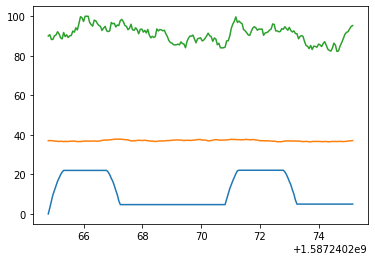

In [14]:
pl.plot(tt, [s.pressure for s in ls], label = 'pressure')
pl.plot(tt, [s.temp for s in ls], label = "humidity")
pl.plot(tt, [s.humidity for s in ls], label = "pressure")
pl.legend

## Notepad

In [7]:
import threading
import time

exitFlag = 0

class ControllerThread(threading.Thread):
    def __init__(self, threadID, name, counter):
        threading.Thread.__init__(self)
        self.threadID = threadID
        self.name = name
        self.counter = counter
        
    def run(self):
        while self.counter:
            if exitFlag:
                self.name.exit()
            time.sleep(1)
            print ("%s: %s" % (self.name, time.ctime(time.time())))
            self.counter -= 1

    def status(self):
        print("...happy... and counter=" + str(self.counter)+'.\n')
            

# Create new threads
thread1 = ControllerThread(1, "Thread-1", 5)

# Start new Threads
thread1.start()
print("continuing code")

thread1.status()
time.sleep(3)
thread1.status()


continuing code
...happy... and counter=5.

Thread-1: Sat Apr 18 13:05:57 2020
Thread-1: Sat Apr 18 13:05:58 2020
...happy... and counter=3.

Thread-1: Sat Apr 18 13:05:59 2020
Thread-1: Sat Apr 18 13:06:00 2020
Thread-1: Sat Apr 18 13:06:01 2020
